<a href="https://colab.research.google.com/github/vlsantos-bit/Plotagem-dos-Dados_GRIB2-Saida-de-modelo/blob/master/Grib.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!sudo apt-get install python-grib
#!sudo python setup.py install
#!sudo apt-get install libgeos-dev
#!sudo pip3 install -U git+https://github.com/matplotlib/basemap.git



Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  libeccodes-data libeccodes-dev libeccodes0 libgrib2c-dev libgrib2c0d
  python-grib-doc python-pyproj python3-grib python3-pyproj
The following NEW packages will be installed:
  libeccodes-data libeccodes-dev libeccodes0 libgrib2c-dev libgrib2c0d
  python-grib python-grib-doc python-pyproj python3-grib python3-pyproj
0 upgraded, 10 newly installed, 0 to remove and 25 not upgraded.
Need to get 24.4 MB of archives.
After this operation, 122 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libeccodes-data all 2.6.0-2 [1,260 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libeccodes0 amd64 2.6.0-2 [1,601 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libeccodes-dev amd64 2.6.0-2 [1,850 kB]
Get:4 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libgr

In [0]:
!wget https://nomads.ncdc.noaa.gov/data/gfsanl/202001/20200118/gfsanl_3_20200118_0600_006.grb2

--2020-04-10 04:00:24--  https://nomads.ncdc.noaa.gov/data/gfsanl/202001/20200118/gfsanl_3_20200118_0600_006.grb2
Resolving nomads.ncdc.noaa.gov (nomads.ncdc.noaa.gov)... 205.167.25.166, 2610:20:8040:2::166
Connecting to nomads.ncdc.noaa.gov (nomads.ncdc.noaa.gov)|205.167.25.166|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 27747235 (26M) [text/plain]
Saving to: ‘gfsanl_3_20200118_0600_006.grb2’

gfsanl_3_20200118_0 100%[===================>]  26.46M  7.40MB/s    in 3.9s    

2020-04-10 04:00:28 (6.72 MB/s) - ‘gfsanl_3_20200118_0600_006.grb2’ saved [27747235/27747235]



In [0]:
import pygrib
from mpl_toolkits.basemap import Basemap
from mpl_toolkits.basemap import shiftgrid
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd



In [0]:
import pygrib


In [0]:
grib = ('gfsanl_3_20200118_0600_006.grb2');
gr = pygrib.open(grib)



In [0]:
dado = gr[421]

In [0]:
temp_vals = dado.values

x = pd.DataFrame(temp_vals[:])
print(x)

#plt.plot(x)

              0             1    ...           358           359
0    98495.757812  98495.757812  ...  98495.757812  98495.757812
1    98738.960938  98740.554688  ...  98732.554688  98735.757812
2    99026.960938  99030.156250  ...  99022.156250  99025.359375
3    99274.960938  99276.554688  ...  99271.757812  99274.960938
4    99506.960938  99508.554688  ...  99503.757812  99505.359375
..            ...           ...  ...           ...           ...
176  70855.757812  70798.156250  ...  70974.156250  70913.359375
177  71151.757812  71078.156250  ...  71298.960938  71225.359375
178  70849.359375  70793.359375  ...  70945.359375  70902.156250
179  70217.359375  70199.757812  ...  70255.757812  70236.554688
180  69503.757812  69503.757812  ...  69503.757812  69503.757812

[181 rows x 360 columns]


In [0]:
grb = gr.select(name='Surface pressure')[0]

data, lats, lons = grb.data(lat1=-35,lat2=-25,lon1=302,lon2=315)
print(grb)
 
 



421:Surface pressure:Pa (instant):regular_ll:surface:level 0:fcst time 6 hrs:from 202001180600


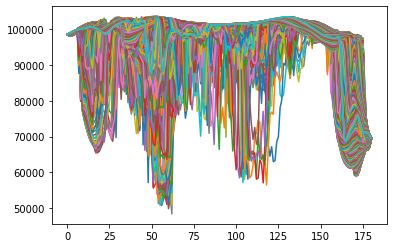

In [0]:
plt.plot(temp_vals)

In [0]:
 !pip install geojsoncontour
 import geojsoncontour


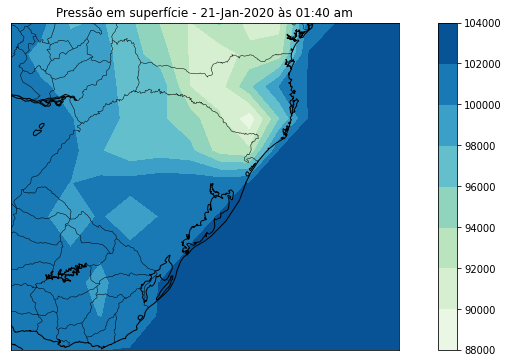

{"features":[{"geometry":{"coordinates":[[[[889558.994,885492.423],[911138.158,860729.79],[889558.994,815998.629],[889558.994,885492.423]]]],"type":"MultiPolygon"},"properties":{"fill":"#ebf7e5","fill-opacity":0.9,"stroke":"#ebf7e5","stroke-opacity":1,"stroke-width":2,"title":"88000.00 "},"type":"Feature"},{"geometry":{"coordinates":[[[[667169.246,1218562.93],[674273.331,1218562.93],[778364.12,1141786.982],[851057.122,1099926.246],[801985.811,980658.617],[889558.994,920740.742],[941854.974,860729.79],[889558.994,752326.15],[785587.24,860729.79],[667169.246,979158.436],[666413.621,980658.617],[660014.392,1099926.246],[667169.246,1218562.93]],[[846656.586,860729.79],[889558.994,815998.629],[911138.158,860729.79],[846656.586,860729.79]]],[[[889558.994,1218562.93],[1007600.346,1218562.93],[1000753.869,1172857.035],[889558.994,1149128.444],[889558.994,1218562.93]]]],"type":"MultiPolygon"},"properties":{"fill":"#d6efd0","fill-opacity":0.9,"stroke":"#d6efd0","stroke-opacity":1,"stroke-width":

In [0]:

#Função Basemap, plotar a projeção, o recorte das latitude e longitude e definir a resolução da imagem.


m = Basemap(projection='mill',llcrnrlat=-35,urcrnrlat=-25,\
            llcrnrlon=302,urcrnrlon=315,resolution='i')



#Função Matplotlib para definir o tamanho da figura.
plt.figure(figsize=(8,10))

#Inserindo os lat e lon a figura criada pelo Basemap e vinculando às variavéis  x e y
x, y = m(lons, lats)

#Função do Basemap para iserir ao mapa continentes, países e estados.
m.drawcoastlines()
m.drawcountries()
m.drawstates()

#Função do Basemap para realizar a interpolação e criação de polígonos
contourf = m.contourf(x, y, np.squeeze(data),cmap='GnBu')

print(contourf)
m.colorbar(contourf, location='right', pad="10%")
#Inserir titulo a imagem 

#Convertendo para o formato Geojson


geojson = geojsoncontour.contourf_to_geojson(
    contourf=contourf,
    min_angle_deg=3.0,
    ndigits=3,
    stroke_width=2,
)



plt.title('Pressão em superfície - 21-Jan-2020 às 01:40 am')

#Plotar imagem
plt.show()
print(geojson)


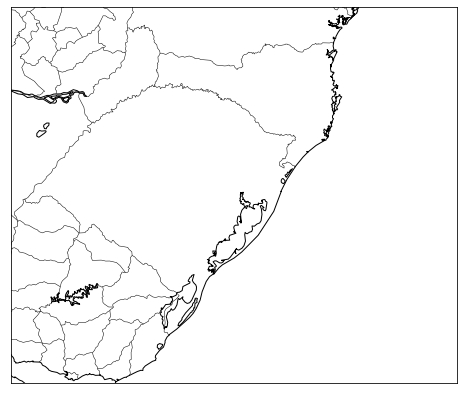

In [0]:
plt.figure(figsize=(8,10))


m.drawcoastlines()
m.drawcountries()
m.drawstates()

m = Basemap(projection='mill',llcrnrlat=-35,urcrnrlat=-25,\
            llcrnrlon=302,urcrnrlon=315,resolution='i')
plt.show()






In [0]:
geojson = geojsoncontour.contourf_to_geojson(
    contourf=contourf,
    geojson_filepath='out.geojson',
    unit='m',
)



In [0]:
#######################Altura Geopotencial###################################
grb1 = gr.select(name='Geopotential Height')[3]

data, lats, lons = grb1.data(lat1=-35,lat2=-25,lon1=302,lon2=315)
print(grb1)

gh = grb1.values
print(gh)

24:Geopotential Height:gpm (instant):regular_ll:isobaricInhPa:level 500 Pa:fcst time 0 hrs:from 201906120000
[[37089.96  37089.96  37089.96  ... 37089.96  37089.96  37089.96 ]
 [37088.2   37088.2   37088.2   ... 37088.2   37088.2   37088.2  ]
 [37085.    37085.    37085.    ... 37085.32  37085.16  37085.16 ]
 ...
 [31313.959 31313.16  31312.2   ... 31316.84  31315.879 31314.92 ]
 [31349.318 31348.68  31348.36  ... 31350.76  31350.28  31349.799]
 [31388.52  31388.52  31388.52  ... 31388.52  31388.52  31388.52 ]]


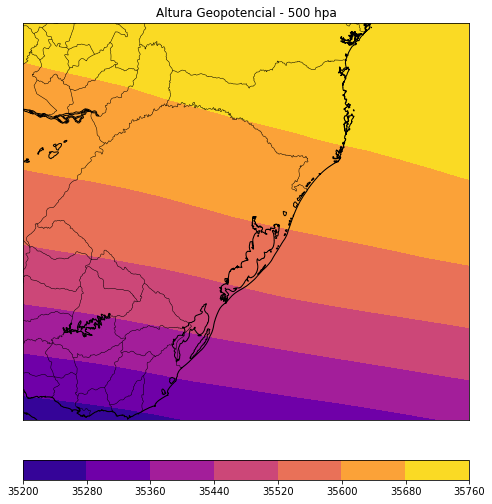

In [0]:
m = Basemap(projection='merc',llcrnrlat=-35,urcrnrlat=-25,\
            llcrnrlon=302,urcrnrlon=315,resolution='f')

plt.figure(figsize=(8,10))

x, y = m(lons, lats)

m.drawcoastlines()
m.drawcountries()
m.drawstates()

contourf1 = m.contourf(x, y, np.squeeze(data),cmap='plasma')
m.colorbar(contourf1, location='bottom', pad="10%")


plt.title('Altura Geopotencial - 500 hpa')
plt.show()

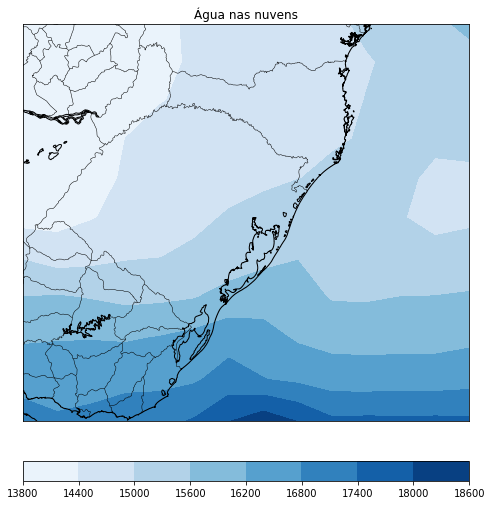

In [0]:
m = Basemap(projection='merc',llcrnrlat=-35,urcrnrlat=-25,\
            llcrnrlon=302,urcrnrlon=315,resolution='f')

plt.figure(figsize=(8,10))

x, y = m(lons, lats)

m.drawcoastlines()
m.drawcountries()
m.drawstates()

contourf3 = m.contourf(x, y, np.squeeze(data),cmap='Blues')
m.colorbar(contourf3, location='bottom', pad="10%")


plt.title('Água nas nuvens')
plt.show()